In [22]:
import numpy as np 
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
pos =Path('E:\\Download\\Research_&_Projects\\archive\\test\\Positive')
neg =Path('E:\\Download\\Research_&_Projects\\archive\\test\\Negative')

In [24]:
list(pos.glob(r'*.jpg'))

[WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0677_10_16.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0677_14_17.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0677_5_14.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0678_3_12.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0678_4_13.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0685_4_9.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_5_14.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_5_15.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_5_17.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_6_8.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0689_10_20.jpg'),
 WindowsPath('E:/Dow

In [25]:
#Creating Dataframe
def generate_df(img, label):
    filepaths = pd.Series(list(img.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df= pd.concat([filepaths,labels], axis = 1)
    return df

In [26]:
pos_df = generate_df(pos, label="POSITIVE")
neg_df = generate_df(neg, label="NEGATIVE")

all_df = pd.concat([pos_df,neg_df], axis = 0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [27]:
all_df

,Filepath,Label
0,E:\Download\Research_&_Projects\archive\test\P...,POSITIVE
1,E:\Download\Research_&_Projects\archive\test\P...,POSITIVE
2,E:\Download\Research_&_Projects\archive\test\P...,POSITIVE
3,E:\Download\Research_&_Projects\archive\test\N...,NEGATIVE
4,E:\Download\Research_&_Projects\archive\test\N...,NEGATIVE
...,...,...
195,E:\Download\Research_&_Projects\archive\test\N...,NEGATIVE
196,E:\Download\Research_&_Projects\archive\test\N...,NEGATIVE
197,E:\Download\Research_&_Projects\archive\test\P...,POSITIVE
198,E:\Download\Research_&_Projects\archive\test\N...,NEGATIVE


In [28]:
train_pos =Path('E:\\Download\\Research_&_Projects\\archive\\train\\Positive')
train_neg =Path('E:\\Download\\Research_&_Projects\\archive\\train\\Negative')

In [29]:
list(pos.glob(r'*.jpg'))

[WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0677_10_16.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0677_14_17.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0677_5_14.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0678_3_12.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0678_4_13.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0685_4_9.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_5_14.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_5_15.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_5_17.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_6_8.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0689_10_20.jpg'),
 WindowsPath('E:/Dow

In [9]:
train_pos_df = generate_df(train_pos, label="POSITIVE")
train_neg_df = generate_df(train_neg, label="NEGATIVE")

train_all_df = pd.concat([train_pos_df,train_neg_df], axis = 0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [10]:
train_all_df

,Filepath,Label
0,E:\Download\Research_&_Projects\archive\train\...,NEGATIVE
1,E:\Download\Research_&_Projects\archive\train\...,NEGATIVE
2,E:\Download\Research_&_Projects\archive\train\...,NEGATIVE
3,E:\Download\Research_&_Projects\archive\train\...,NEGATIVE
4,E:\Download\Research_&_Projects\archive\train\...,POSITIVE
...,...,...
595,E:\Download\Research_&_Projects\archive\train\...,POSITIVE
596,E:\Download\Research_&_Projects\archive\train\...,POSITIVE
597,E:\Download\Research_&_Projects\archive\train\...,POSITIVE
598,E:\Download\Research_&_Projects\archive\train\...,POSITIVE


In [30]:
val_pos =Path('E:\\Download\\Research_&_Projects\\archive\\valid\\Positive')
val_neg =Path('E:\\Download\\Research_&_Projects\\archive\\valid\\Negative')

In [31]:
list(pos.glob(r'*.jpg'))

[WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0677_10_16.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0677_14_17.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0677_5_14.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0678_3_12.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0678_4_13.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0685_4_9.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_5_14.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_5_15.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_5_17.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0687_6_8.jpg'),
 WindowsPath('E:/Download/Research_&_Projects/archive/test/Positive/DJI_0689_10_20.jpg'),
 WindowsPath('E:/Dow

In [32]:
val_pos_df = generate_df(val_pos, label="POSITIVE")
val_neg_df = generate_df(val_neg, label="NEGATIVE")

val_all_df = pd.concat([val_pos_df,val_neg_df], axis = 0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [33]:
val_all_df

,Filepath,Label
0,E:\Download\Research_&_Projects\archive\valid\...,POSITIVE
1,E:\Download\Research_&_Projects\archive\valid\...,POSITIVE
2,E:\Download\Research_&_Projects\archive\valid\...,POSITIVE
3,E:\Download\Research_&_Projects\archive\valid\...,NEGATIVE
4,E:\Download\Research_&_Projects\archive\valid\...,NEGATIVE
...,...,...
195,E:\Download\Research_&_Projects\archive\valid\...,NEGATIVE
196,E:\Download\Research_&_Projects\archive\valid\...,NEGATIVE
197,E:\Download\Research_&_Projects\archive\valid\...,POSITIVE
198,E:\Download\Research_&_Projects\archive\valid\...,NEGATIVE


In [34]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

test_gen =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

valid_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [37]:
train_data = train_gen.flow_from_dataframe(
    train_all_df,
    x_col='Filepath',
    y_col ='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 600 validated image filenames belonging to 2 classes.


In [38]:
val_data = train_gen.flow_from_dataframe(
    val_all_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 200 validated image filenames belonging to 2 classes.


In [39]:
test_data = train_gen.flow_from_dataframe(
    all_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 200 validated image filenames belonging to 2 classes.


In [41]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_2   (None, 32)               0   

In [42]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
19/19 [==============================] - 5s 201ms/step - loss: 0.6957 - accuracy: 0.4900 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoch 2/100
19/19 [==============================] - 3s 131ms/step - loss: 0.6889 - accuracy: 0.5333 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 3/100
19/19 [==============================] - 3s 131ms/step - loss: 0.6817 - accuracy: 0.5400 - val_loss: 0.6801 - val_accuracy: 0.6700
Epoch 4/100
19/19 [==============================] - 2s 121ms/step - loss: 0.6779 - accuracy: 0.5983 - val_loss: 0.6702 - val_accuracy: 0.7450
Epoch 5/100
19/19 [==============================] - 2s 121ms/step - loss: 0.6664 - accuracy: 0.6050 - val_loss: 0.6742 - val_accuracy: 0.5000
Epoch 6/100
19/19 [==============================] - 2s 121ms/step - loss: 0.6579 - accuracy: 0.6350 - val_loss: 0.6453 - val_accuracy: 0.6200
Epoch 7/100
19/19 [==============================] - 2s 122ms/step - loss: 0.6503 - accuracy: 0.6267 - val_loss: 0.6298 - val_accuracy: 0.8300

In [43]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Training and Validation Loss Over Time"
)

fig.show()

In [44]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int_))
    cm = confusion_matrix(test_data.labels, y_pred)
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

    Test Loss: 0.63026
Test Accuracy: 68.50%
7/7 [==============================] - 1s 61ms/step


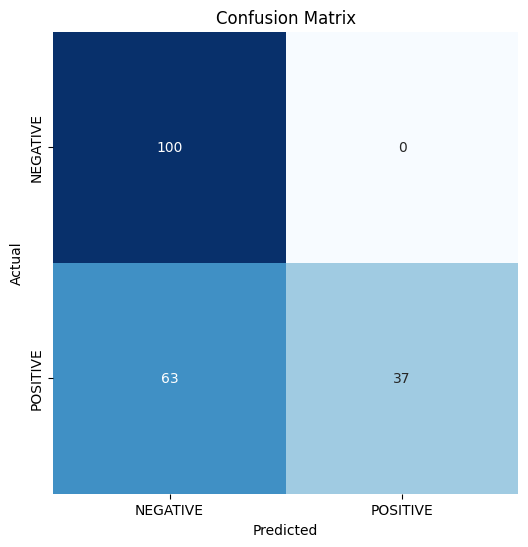

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.61      1.00      0.76       100
    POSITIVE       1.00      0.37      0.54       100

    accuracy                           0.69       200
   macro avg       0.81      0.69      0.65       200
weighted avg       0.81      0.69      0.65       200



In [45]:
evaluate_model(model, test_data)